# Digit Recognition

Using the digits dataset from sklearn, different classifier models are tested.

In [65]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, tree, svm, linear_model, metrics, preprocessing, pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report

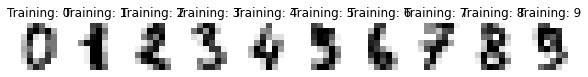

In [44]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' %label)

In [92]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X = data
y = digits.target

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.4, random_state=0)

# cross validation folds
cv = 10


# test
def test_classifier(predicted, clf):
    _, axes = plt.subplots(nrows=1, ncols=7, figsize=(10,3))
    for ax, image, prediction in zip(axes, X_test, predicted):
        ax.set_axis_off()
        image = image.reshape(8,8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title(f'Prediction: {prediction}')

    print(f"Classifier score: {clf.score(X_test, y_test)}")

    print(f"Classification report for classifier {clf}:\n"
          f"{metrics.classification_report(y_test, predicted)}\n")
    
# cross validation
def cross_validate(X, y, clf, cv):
    scores = cross_val_score(clf, X, y, cv=cv)
    print(f"Cross validation score, using {cv} folds")
    for i, score in enumerate(scores):
        print(f"Test {i}: {score}")
    print(f"Mean score: {np.mean(scores)}, std: {np.std(scores)}")
    

# use grid search to find optimal parameters
def fit_grid_search_params(parameters, clf):
    clf = GridSearchCV(clf, parameters, cv=cv)
    clf.fit(X_train,y_train)
    print(f"Optimal setting: {clf.best_params_}")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print("Results on test set")
    print(classification_report(y_true, y_pred))
    return clf

### K Nearest Neighbours

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# find optimal K
k_values = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

knn = fit_grid_search_params(k_values, KNeighborsClassifier())

cross_validate(X, y, knn, 10)

Optimal setting: {'n_neighbors': 1}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.97      1.00      0.99        73
           2       1.00      1.00      1.00        71
           3       0.96      1.00      0.98        70
           4       1.00      1.00      1.00        63
           5       0.99      0.98      0.98        89
           6       0.99      1.00      0.99        76
           7       1.00      1.00      1.00        65
           8       1.00      0.95      0.97        78
           9       0.97      0.96      0.97        74

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719

Cross validation score, using 10 folds
Test 0: 0.9333333333333333
Test 1: 1.0
Test 2: 0.9722222222222222
Test 3: 0.9722222222222222
Test 4: 0.9666666666666667
Test 5: 0.9833333333333333
Test 6: 0.99444444

### Decision Tree

In [59]:
# create decision tree classifier
params = {'max_depth': [1,3,5,10,12,15,17,20]}
dec_tree = fit_grid_search_params(params, tree.DecisionTreeClassifier())

#dec_tree = clf.fit(X_train, y_train)
#predicted = dec_tree.predict(X_test)
#test_classifier(predicted, dec_tree)

cross_validate(X, y, dec_tree, cv)

Optimal setting: {'max_depth': 15}

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        60
           1       0.81      0.84      0.82        73
           2       0.93      0.75      0.83        71
           3       0.87      0.84      0.86        70
           4       0.85      0.84      0.85        63
           5       0.85      0.80      0.82        89
           6       0.92      0.96      0.94        76
           7       0.75      0.94      0.84        65
           8       0.75      0.62      0.68        78
           9       0.74      0.82      0.78        74

    accuracy                           0.83       719
   macro avg       0.84      0.84      0.83       719
weighted avg       0.84      0.83      0.83       719

Cross validation score, using 10 
Test 0: 0.7722222222222223
Test 1: 0.8444444444444444
Test 2: 0.8277777777777777
Test 3: 0.7722222222222223
Test 4: 0.7777777777777778
Test 5: 0.8777777777777778
Test 6: 0

### Support Vector Machine

In [86]:
# create support vector machine classifier

clf = pipeline.make_pipeline(preprocessing.StandardScaler(), svm.SVC())
clf.fit(X_train, y_train)
print(f"Score: {clf.score(X_test, y_test)}")
cross_validate(X, y, clf, cv)

print(f"Using {clf.get_params().keys()}")
print()

param_grid = [
    {'svc__C': np.linspace(1, 3, 5), 'svc__gamma': np.linspace(0, 1, 4), 'svc__kernel': ['rbf']},
    {'svc__C': np.linspace(1, 3, 5), 'svc__degree': [2, 3, 4, 5], 'svc__kernel': ['poly']},
]

print()
svc = fit_grid_search_params(param_grid, clf)

Score: 0.9819193324061196
Cross validation score, using 10 folds
Test 0: 0.9444444444444444
Test 1: 0.9944444444444445
Test 2: 0.9777777777777777
Test 3: 0.9111111111111111
Test 4: 0.9777777777777777
Test 5: 0.9888888888888889
Test 6: 0.9777777777777777
Test 7: 0.9441340782122905
Test 8: 0.9608938547486033
Test 9: 0.9553072625698324
Mean score: 0.9632557417752947, std: 0.02402037522167597
Using dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])


Optimal setting: {'svc__C': 2.5, 'svc__degree': 2, 'svc__kernel': 'poly'}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
     

### Ridge Classifier

Classifier score: 0.9248956884561892
Classification report for classifier RidgeClassifier():
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       0.92      0.89      0.90        73
           2       0.87      0.96      0.91        71
           3       0.94      0.91      0.93        70
           4       0.97      0.95      0.96        63
           5       0.94      0.96      0.95        89
           6       0.95      0.95      0.95        76
           7       0.94      0.97      0.95        65
           8       0.97      0.78      0.87        78
           9       0.82      0.91      0.86        74

    accuracy                           0.92       719
   macro avg       0.93      0.93      0.93       719
weighted avg       0.93      0.92      0.92       719


Optimal setting: {'alpha': 3.0}

Results on test set
              precision    recall  f1-score   support

           0       0.95      1.00      

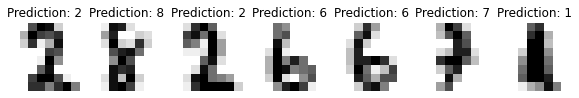

In [94]:
# create ridge classifier
rc = linear_model.RidgeClassifier()
rc = rc.fit(X_train, y_train)
predicted = rc.predict(X_test)
test_classifier(predicted, rc)

# use grid search to tune alpha
params = {'alpha': np.linspace(1, 4, 10)}
rc = fit_grid_search_params(params, linear_model.RidgeClassifier())

cross_validate(X, y, rc, cv)